   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


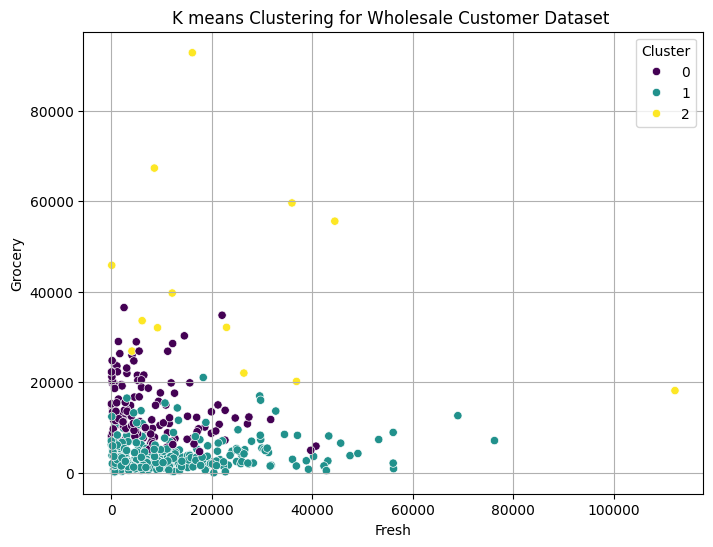

In [19]:
# 	K-Means Clustering for Customer Segmentation
import pandas as pd     
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns 

customer = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_18/Wholesale customers data.csv')
print(customer.head(5))

x = customer.drop(columns=['Region'])

scaler = StandardScaler()
x = scaler.fit_transform(x)

mean = KMeans(n_clusters=3,random_state=42)
customer['Cluster'] = mean.fit_predict(x)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Fresh',y='Grocery',hue='Cluster',palette='viridis',data=customer)
plt.title('K means Clustering for Wholesale Customer Dataset ')
plt.grid()
plt.show()


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


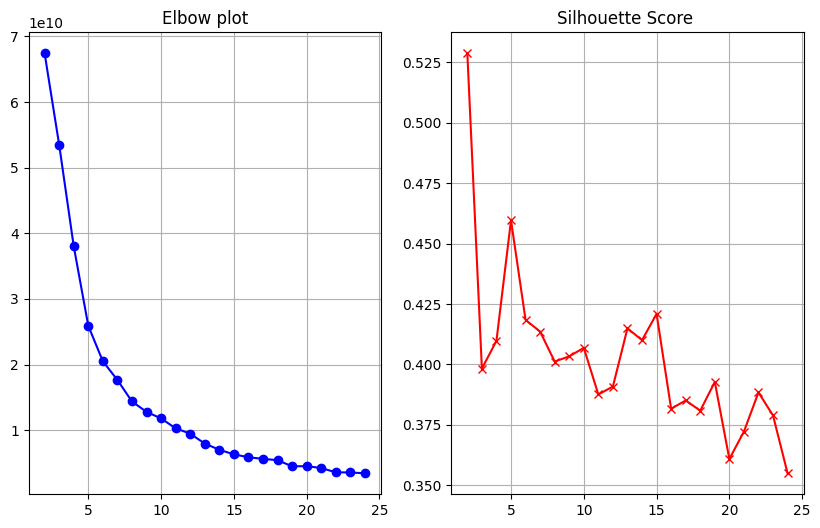

In [33]:
import pandas as pd     
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score

customer = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_18/Wholesale customers data.csv')
print(customer.head(5))

x = customer.drop(columns=['Region'])

scaler = StandardScaler()
x = scaler.fit_transform(x)

def palestine(data, n):
    mean = []
    inertia = []
    score =[]
    
    for i in range(2, n):
        K = KMeans(n_clusters=i)
        labels = K.fit_predict(data)
        mean.append(i)
        inertia.append(K.inertia_)
        score.append(silhouette_score(data, labels))
    
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.plot(mean, inertia, marker='o', c='b')
    plt.title('Elbow plot')
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(mean, score, marker='x', c='r')
    plt.title('Silhouette Score ')
    plt.grid()
    plt.show()
    
palestine(customer[['Fresh','Grocery']], 25)


In [36]:
# 	Cluster Analysis and Interpretation
import pandas as pd     
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns 

customer = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_18/Wholesale customers data.csv')
x = customer.drop(columns=['Region'])

scaler = StandardScaler()
x = scaler.fit_transform(x)

mean = KMeans(n_clusters=3,random_state=42)
customer['Cluster'] = mean.fit_predict(x)

Cluster_summary = customer.groupby('Cluster').median().round(3)
print(Cluster_summary)

         Channel  Region    Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Cluster                                                                         
0            2.0     3.0   5474.0   7621.0  12007.5  1062.5            5131.0   
1            1.0     3.0   9561.0   2132.0   2661.0  2046.0             385.0   
2            2.0     3.0  16117.0  29892.0  33586.0  3254.0           19410.0   

         Delicassen  
Cluster              
0            1280.0  
1             819.0  
2            2944.0  


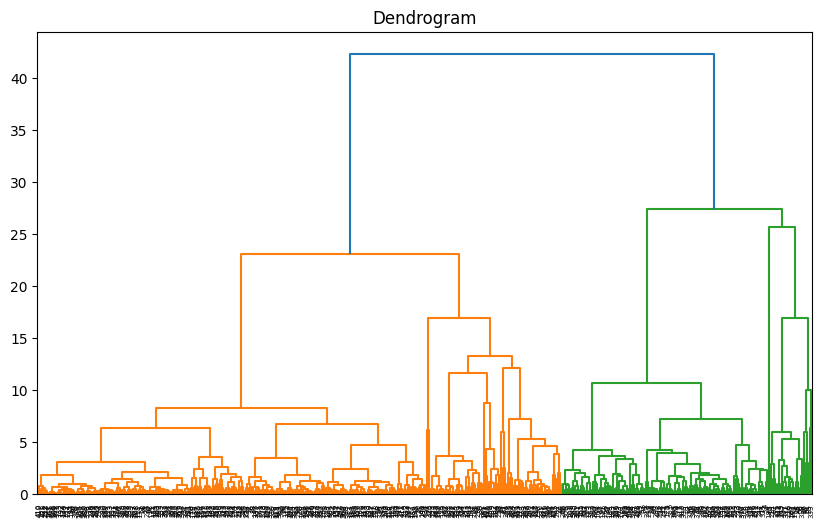

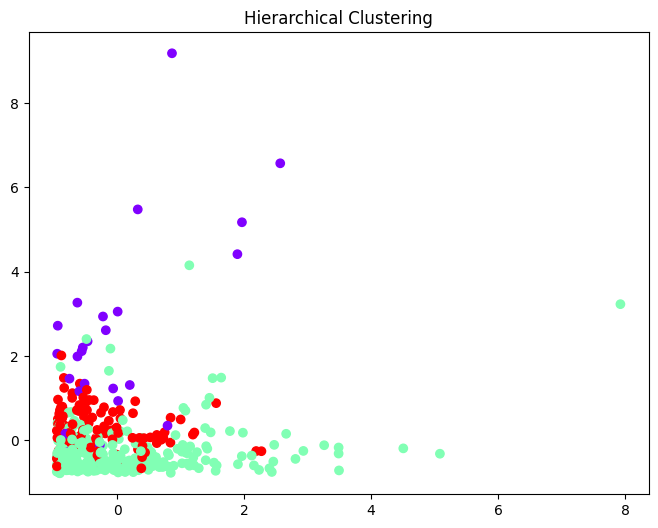

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

customer = pd.read_csv('C:/Users/abdul/OneDrive/Desktop/ByteWise_ML/Day_18/Wholesale customers data.csv')
x = customer.drop(columns=['Region'])

scaler = StandardScaler()
x = scaler.fit_transform(x)

y = linkage(x, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(y)
plt.title('Dendrogram')
plt.show()

clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(x)

plt.figure(figsize=(8, 6))
plt.scatter(x[:,1], x[:,2], c=labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()


#### K-Means is typically more effective for the Wholesale Customers dataset due to its ability to create compact, well-separated clusters, especially when the number of clusters is well-defined.